In [1]:
from collections import defaultdict

In [2]:
parent = dict()
rank = dict()
def get_edges(g, V):
    edges = []
    for v in V:
        for to, cost in g[v]:
            edges.append((cost, v, to))
    edges = sorted(edges)
    return edges
def make_set(v):
    parent[v] = v
    rank[v] = 0

def find(v):
    if parent[v] != v:
        parent[v] = find(parent[v])
    return parent[v]

def union(v1, v2):
    root1 = find(v1)
    root2 = find(v2)
    if rank[root1] < rank[root2]:
        parent[root1] = root2
    elif rank[root1] > rank[root2]:
        parent[root2] = root1
    
    else:
        parent[root2] = root1
        rank[root1] += 1

def kruskal(graph, V):
    mst = defaultdict(set)
    for v in V:
        make_set(v)
        edges = get_edges(graph, V)
        edges.sort()
        #print edges
    for edge in edges:
        w, v1, v2 = edge
        if find(v1) != find(v2):
            union(v1, v2)
            mst[v1].add((v2, w))

    return dict(mst)

V = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
example_graph = {
    'A': {('B', 7), ('D', 5)},
    'B': {('A', 7), ('C', 8), ('D', 9), ('E', 7)},
    'C': {('B', 8), ('E', 5)},
    'D': {('A', 5), ('B', 9), ('E', 15), ('F', 6)},
    'E': {('B', 7), ('C', 5), ('D', 15), ('F', 8), ('G', 9)},
    'F': {('D', 6), ('E', 8), ('G', 11)},
    'G': {('E', 9), ('F', 11)},
}

In [3]:
mst = kruskal(example_graph, V)
print(mst)

{'A': {('B', 7), ('D', 5)}, 'C': {('E', 5)}, 'D': {('F', 6)}, 'B': {('E', 7)}, 'E': {('G', 9)}}


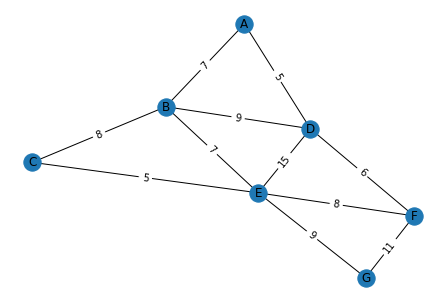

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
import pylab
def drawMST(graph):
    G = nx.Graph()
    for keys, values in graph.items():
        for value, cost in values:
            G.add_edge(keys, value, weight=cost)
    pos=nx.spring_layout(G)
    pylab.figure(2)
    nx.draw(G,pos, with_labels = True)
    edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

    # show graphs
    pylab.show()

drawMST(example_graph)

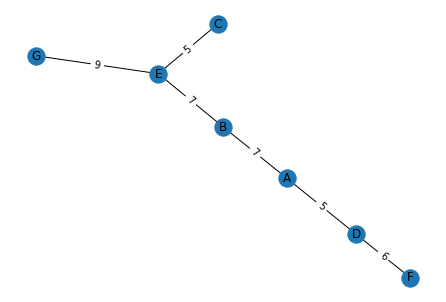

In [5]:
drawMST(mst)

#### ứng dụng 

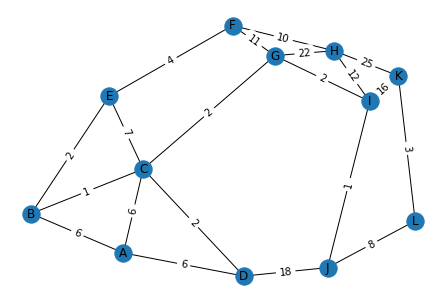

In [6]:
V = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
g = {
    "A": {('B', 6), ('C', 6), ('D', 6)},
    "B": {('A', 6), ('C', 1), ('E', 7)},
    "C": {('A', 6), ('D', 2), ('G', 2)},
    "D": {('A', 6), ('C', 2), ('J', 18)},
    "E": {('B', 2), ('C', 7), ('F', 4)},
    "F": {('E', 4), ('G', 11), ('H', 10)},
    "G": {('C', 2), ('F', 11), ('H', 22), ('I', 2)},
    "H": {('F', 10), ('G', 22), ('I', 12), ('K', 25)},
    "I": {('G', 2), ('H', 12), ('J', 1)},
    "J": {('D', 18), ('I', 1), ('L', 8)},
    "K": {('H', 25), ('I', 16), ('L', 3)},
    "L": {('J', 8), ('K', 3)}
    }

drawMST(g)

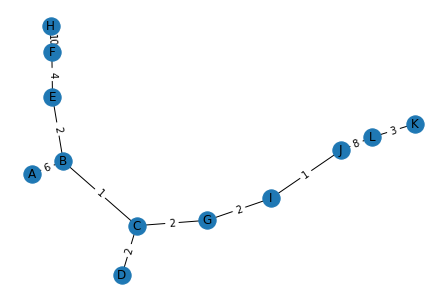

In [8]:
mst = kruskal(g, V)
drawMST(mst)